In [0]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
import numpy as np
%matplotlib inline

In [0]:
def head(x,y):
  print("Input Features         Output")
  for i in range(5):
    print(x[i],' ',y[i])

In [0]:
# Syntesize dataset with 1000 datapoints and 2 features
# Categorical values conversion to numerical target
from sklearn.datasets.samples_generator import make_blobs
x_label, y_label = make_blobs(n_samples=1000,random_state=0,
                   cluster_std=0.50, centers=2)
#n_samples is the number of blobs (1000), with 2 visible cluster (centers=2)
#cluster_std is the seperation scale (standard deviation) 
#x=input features, y=output

In [37]:
head(x_label,y_label)
#printing the head of the dataset
print('\nLength: '+str(len(x_label)))

Input Features         Output
[0.72144399 4.08475018]   0
[1.91004907 3.81514839]   0
[0.79374247 3.40812355]   0
[2.93590059 1.27471149]   1
[1.66811998 0.76296877]   1

Length: 1000


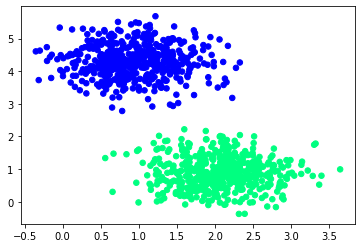

In [38]:
plt.scatter(x_label[:, 0], x_label[:, 1], c=y_label, s=30, cmap='winter')
plt.show()
#plot a scatterplot 

In [39]:
#fit a support vector machine

#Support vector linear classifier
svm_model = SVC(kernel='linear', C=1E10, random_state=0)
svm_model.fit(x_label, y_label)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_hyperplane(svm_model, axis=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if axis is None:
        axis = plt.gca()
    xlim = axis.get_xlim()
    ylim = axis.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svm_model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    axis.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=[':', '-', ':'])
    
    # plot support vectors
    if plot_support:
        axis.scatter(svm_model.support_vectors_[:, 0],
                   svm_model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    axis.set_xlim(xlim)
    axis.set_ylim(ylim)

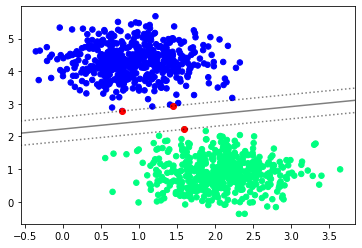

In [41]:
#visualising suport vectors on graph (marked red)\
#blue=0, green=1
plt.scatter(x_label[:, 0], x_label[:, 1], c=y_label, s=30, cmap='winter')
plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1] , color="r")
plot_hyperplane(svm_model);

In [42]:
#coordinates of support vectors
print(svm_model.support_vectors_)

[[0.78007558 2.7807158 ]
 [1.44779312 2.93394874]
 [1.59544218 2.21913152]]


In [43]:
#get slope and y-intercept of hyperplane
print(svm_model.coef_)

[[ 0.61315854 -2.67186712]]


In [44]:
#predict for a random input
print(svm_model.predict([[1.5,4]]))

[0]


In [45]:
#length before removing vectors
print(len(x_label),len(y_label))

1000 1000


In [0]:
#loop to delete 3 vectors
cnt,i=3,0
while cnt!=0:
  if x_label[i] not in svm_model.support_vectors_:
    x_label=np.delete(x_label,i,axis=0)
    y_label=np.delete(y_label,i,axis=0)
    cnt-=1
  i+=1

In [47]:
print(len(x_label),len(y_label))
#deleting 3 non support vectors

997 997


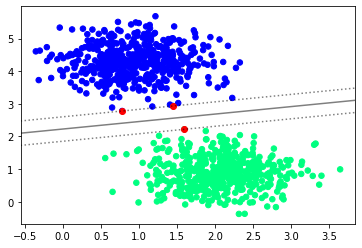

In [48]:
#visualising suport vectors on graph
#blue=0, green=1, red=support vectors
plt.scatter(x_label[:, 0], x_label[:, 1], c=y_label, s=30, cmap='winter')
plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1] , color="r")
plot_hyperplane(svm_model);

In [49]:
print(svm_model.support_vectors_)

array([[0.78007558, 2.7807158 ],
       [1.44779312, 2.93394874],
       [1.59544218, 2.21913152]])

# Conclusion

No change in the support vectors was observed even after deleting other non support vectors.